
<h2 id="Modern-Portfolio-Theory">Modern Portfolio Theory<a class="anchor-link" href="#Modern-Portfolio-Theory">¶</a></h2>



<p>Modern portfolio theory also popularly called as <strong><code>Mean-Variance Portofolio Theory</code> (MVP)</strong> is a major breakthrough in finance. It is based on the premises that returns are <strong>normally distributed</strong> and by looking at mean and variance, we can essentialy describe the distribution of end-of-period wealth.</p>
<p>The basic idea of this theory is to achieve diversification by constructuing portfolio for a minimal portfolio risk or maximal portfolio returns given a certain level of risk. Accordingly, the <strong>Efficient Frontier</strong> is a set of optimal portfolios in the risk-return spectrum and portfolios located under the Efficient Frontier curve are considered sub-optimal.</p>
<p>This means that the portfolios on the frontier offer</p>
<ul>
<li>Highest expected return for a given level of risk</li>
<li>Lowest level of risk for a given level of expected returns</li>
</ul>
<p>In essence, the investors goal should be to select a level of risk that he/she is comfortable with and then find a portfolio that maximizes returns based on the selected risk level.</p>



<h3 id="Import-libraries">Import libraries<a class="anchor-link" href="#Import-libraries">¶</a></h3>


In [1]:
import pandas as pd
import xlwings as xw

import numpy as np
from numpy import *
from numpy.linalg import multi_dot

import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 16, 8

In [29]:
from openpyxl import Workbook, load_workbook


<p>We will use the FAANG stocks as before to build our portfolio</p>


In [2]:
# FAANG stocks
symbols = ['AAPL', 'AMZN', 'FB', 'GOOG', 'NFLX' ]
numofasset = len(symbols)
numofportfolio = 5000


<h3 id="Retrive-Data">Retrive Data<a class="anchor-link" href="#Retrive-Data">¶</a></h3>


In [5]:
# Load locally stored data
df = pd.read_csv('faang_stocks.csv', index_col=0, parse_dates=True)['2013':]

# Check first 5 values 
df.head()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2013-01-02,68.502106,257.309998,28.000000,360.274597,13.144286
2013-01-03,67.637436,258.480011,27.770000,360.483826,13.798572
2013-01-04,65.753418,259.149994,28.760000,367.607117,13.711429
2013-01-07,65.366646,268.459991,29.420000,366.003143,14.171429
2013-01-08,65.542587,266.380005,29.059999,365.280823,13.880000



<h3 id="View-Data-in-Excel">View Data in Excel<a class="anchor-link" href="#View-Data-in-Excel">¶</a></h3>


In [31]:
# View data in Excel
xw.view(df)

In [32]:
# Create a new Excel workbook
wb = xw.Book(r'portfolio.xlsx')     # Book by full name


<h3 id="Descriptive-Statistics">Descriptive Statistics<a class="anchor-link" href="#Descriptive-Statistics">¶</a></h3>


In [33]:
summary = df.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
AAPL,1844.0,133.828548,61.552744,49.010136,89.903442,114.552101,171.176167,326.316681
AMZN,1844.0,935.999095,610.635925,248.229996,363.997498,760.130005,1602.122498,2410.219971
FB,1844.0,120.339805,54.407072,22.900000,75.852501,120.395000,171.262497,223.229996
GOOG,1844.0,818.923745,289.851949,350.122650,553.610077,768.785004,1081.927521,1526.689941
NFLX,1844.0,166.365592,120.688130,13.144286,62.837856,116.965000,291.467506,439.170013



<h3 id="Visualize-Data">Visualize Data<a class="anchor-link" href="#Visualize-Data">¶</a></h3>


/Users/aq/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


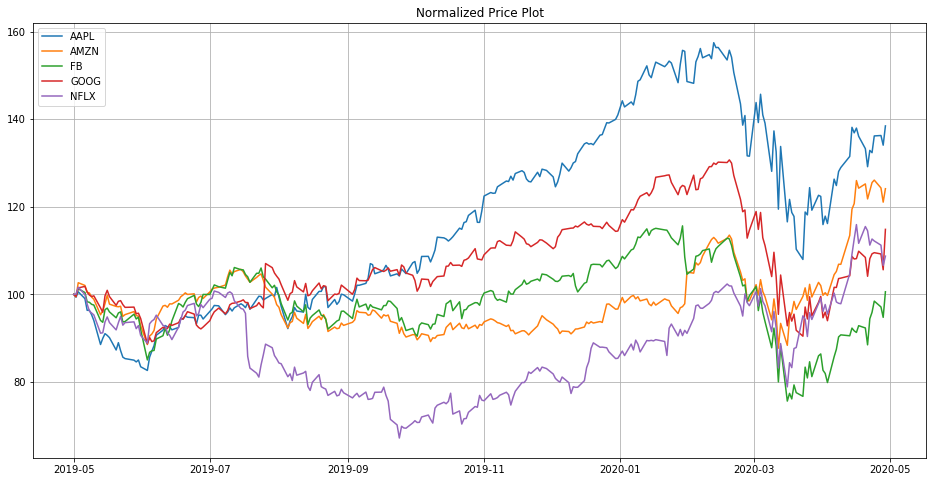

In [40]:
# Visualize the data
fig = plt.figure(figsize=(16,8))
ax = plt.axes()

ax.set_title('Normalized Price Plot')
ax.plot(df[-252:]/df.iloc[-252] * 100)
ax.legend(df.columns, loc='upper left')
ax.grid(True)


<h3 id="Calculate-Returns">Calculate Returns<a class="anchor-link" href="#Calculate-Returns">¶</a></h3>


In [42]:
# Calculate returns 
returns = df.pct_change().fillna(0)
returns.head()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2013-01-02,0.000000,0.000000,0.000000,0.000000,0.000000
2013-01-03,-0.012623,0.004547,-0.008214,0.000581,0.049777
2013-01-04,-0.027855,0.002592,0.035650,0.019760,-0.006315
2013-01-07,-0.005882,0.035925,0.022949,-0.004363,0.033549
2013-01-08,0.002692,-0.007748,-0.012237,-0.001974,-0.020565



<h4 id="Annualized-Returns">Annualized Returns<a class="anchor-link" href="#Annualized-Returns">¶</a></h4><p>In <strong>MVP</strong>, the average returns play an important role as they are used to approximate the expected returns.</p>


In [43]:
# Calculate annual returns
annual_returns = (returns.mean() * 252)
annual_returns

AAPL    0.234303
AMZN    0.349191
FB      0.321977
GOOG    0.211949
NFLX    0.574597
dtype: float64

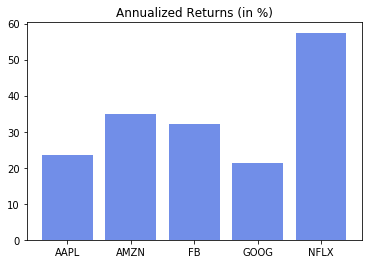

In [44]:
# Visualize the data
fig = plt.figure()
ax =plt.axes()

ax.bar(annual_returns.index, annual_returns*100, color='royalblue', alpha=0.75)
ax.set_title('Annualized Returns (in %)');


<h3 id="Calculate-Volatility">Calculate Volatility<a class="anchor-link" href="#Calculate-Volatility">¶</a></h3>


In [45]:
vols = returns.std()
vols

AAPL    0.017441
AMZN    0.019039
FB      0.021451
GOOG    0.016065
NFLX    0.029188
dtype: float64


<h4 id="Annualized-Volatilities">Annualized Volatilities<a class="anchor-link" href="#Annualized-Volatilities">¶</a></h4>


In [46]:
# Calculate annualized volatilities
annual_vols = vols*sqrt(252)
annual_vols

AAPL    0.276872
AMZN    0.302228
FB      0.340525
GOOG    0.255018
NFLX    0.463346
dtype: float64

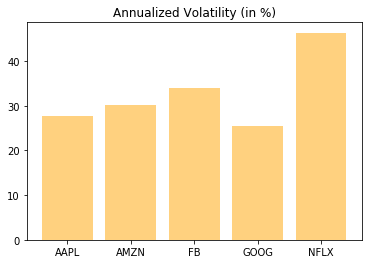

In [47]:
# Visualize the data
fig = plt.figure()
ax = plt.axes()

ax.bar(annual_vols.index, annual_vols*100, color='orange', alpha=0.5)
ax.set_title('Annualized Volatility (in %)');


<h2 id="Portfolio-Statistics">Portfolio Statistics<a class="anchor-link" href="#Portfolio-Statistics">¶</a></h2><p>Consider a portfolio fully invested in risky assets. Let $w$ and $\mu$ be the vector of weights and mean returns of <em>n</em> assets. <br/><br/></p>
$$\ {w=}\left( 
\begin{array}{c}
w_1 \\
w_2 \\
\vdots \\
w_n \\ 
\end{array}%
\right);
\ \mathbf{\mu=}\left( 
\begin{array}{ccc}
\mu_1 \\ 
\mu_2 \\ 
\vdots \\
\mu_n \\ 
\end{array}%
\right)$$<p></p>
<p>where the $\sum_{i=1}^{n}w_i=1$</p>
<p><strong>Expected Portfolio Return</strong> is then the dot product of the expected returns and their weights. <br/><br/></p>
$$\mu_\pi = w^T\cdot\mu$$<p>which is also equivalent to the $\Sigma_{i=1}^{n}w_i\mu_i$</p>
<p><strong>Expected Portfolio Variance</strong> is then the multidot product of weights and the covariance matrix. <br/><br/></p>
$$\sigma^2_\pi = w^T\cdot\Sigma\cdot w $$<p>where, ${\Sigma}$ is the covariance matrix</p>
$${\Sigma=}\left( 
\begin{array}{ccc}
\Sigma_{1,1} &amp; \dots &amp; \Sigma_{1,n} \\ 
\vdots &amp; \ddots &amp; \vdots  \\ 
\Sigma_{n,1} &amp; \dots &amp; \Sigma_{n,n} \\ %
\end{array}%
\right)$$



<h3 id="Equal-Weighted-Portfolio">Equal Weighted Portfolio<a class="anchor-link" href="#Equal-Weighted-Portfolio">¶</a></h3><p>Assume a portoflio composed of all five stocks with equal weighting. We will now calculate the portfolio statistics.</p>


In [64]:
wts = numofasset * [1./numofasset]
array(wts).shape

(5,)

In [65]:
wts = array(wts)[:,newaxis]
wts

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2]])

In [66]:
wts.shape

(5, 1)


<h3 id="Portfolio-Return">Portfolio Return<a class="anchor-link" href="#Portfolio-Return">¶</a></h3>


In [67]:
array(returns.mean() * 252)[:,newaxis]      

array([[0.23430293],
       [0.34919072],
       [0.32197723],
       [0.21194896],
       [0.57459721]])

In [68]:
array(returns.mean() * 252)[:,newaxis].shape 

(5, 1)

In [69]:
# Portfolio returns
wts.T @ array(returns.mean() * 252)[:,newaxis]        

array([[0.33840341]])


<h3 id="Portfolio-Volatility">Portfolio Volatility<a class="anchor-link" href="#Portfolio-Volatility">¶</a></h3>


In [70]:
# Covariance matrix
returns.cov() * 252

,AAPL,AMZN,FB,GOOG,NFLX
AAPL,0.076658,0.035316,0.040423,0.037194,0.031796
AMZN,0.035316,0.091342,0.051584,0.046479,0.061092
FB,0.040423,0.051584,0.115957,0.048473,0.054116
GOOG,0.037194,0.046479,0.048473,0.065034,0.049014
NFLX,0.031796,0.061092,0.054116,0.049014,0.214689


In [71]:
# Portfolio variance
multi_dot([wts.T,returns.cov()*252,wts])

array([[0.05898624]])

In [72]:
# Portfolio volatility
sqrt(multi_dot([wts.T,returns.cov()*252,wts]))

array([[0.24287083]])


<h3 id="Portfolio-statistics">Portfolio statistics<a class="anchor-link" href="#Portfolio-statistics">¶</a></h3><p>Let's subsume key statistics into a function which can be used for optimization exercise.</p>


In [73]:
def portfolio_stats(weights):
    
    weights = array(weights)[:,newaxis]
    port_rets = weights.T @ array(returns.mean() * 252)[:,newaxis]    
    port_vols = sqrt(multi_dot([weights.T, returns.cov() * 252, weights])) 
    
    return np.array([port_rets, port_vols, port_rets/port_vols]).flatten()

In [75]:
pip install pyfolio

     |████████████████████████████████| 92kB 4.0MB/s eta 0:00:011
     |████████████████████████████████| 51kB 11.0MB/s eta 0:00:01
     |████████████████████████████████| 112kB 11.5MB/s eta 0:00:01
  Stored in directory: /Users/aq/Library/Caches/pip/wheels/0d/a8/7d/ac33fe6bf6f3db370291c9de303460d00b8f97cc40a1d80f72
  Stored in directory: /Users/aq/Library/Caches/pip/wheels/10/a4/3b/951bd609878a82fd72b9ea23699daf1eaada4ff6f583152876
Successfully built pyfolio empyrical
Note: you may need to restart the kernel to use updated packages.


/Users/aq/anaconda3/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


Start date,2013-01-02
End date,2020-04-29
Total months,87
,Backtest
Annual return,36.2%
Cumulative returns,857.3%
Annual volatility,24.3%
Sharpe ratio,1.39
Calmar ratio,1.17
Stability,0.97
Max drawdown,-30.9%


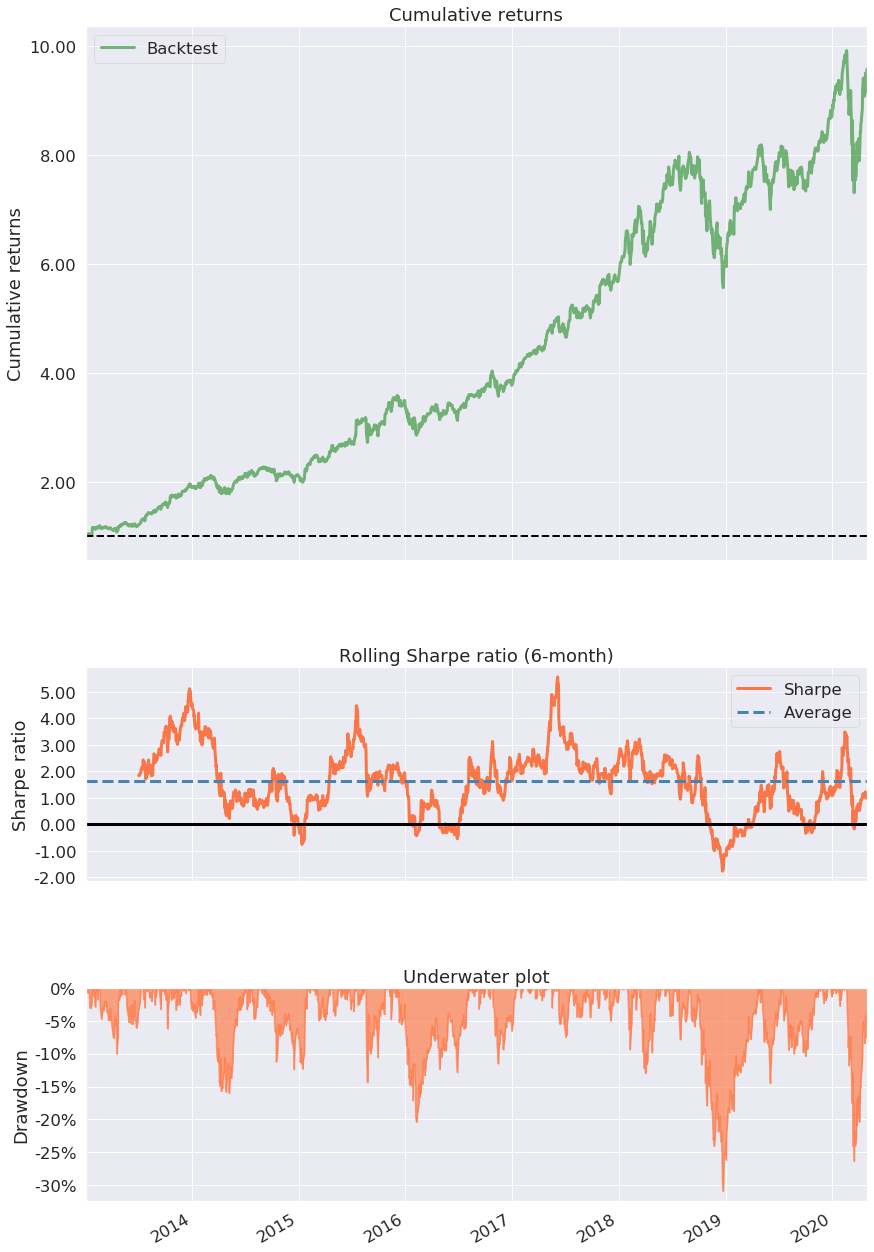

In [76]:
import pyfolio as pf
ewp = returns@wts
ewp.columns =['ret']
ewp.cumsum().iloc[-1]
pf.create_simple_tear_sheet(ewp['ret'])
plt.plot((1+ewp['ret']).cumprod())


<h2 id="Portfolio-Simulation">Portfolio Simulation<a class="anchor-link" href="#Portfolio-Simulation">¶</a></h2><p>Now, we will implement a Monte Carlo simulation to generate random portfolio weights on a larger scale and calculate the expected portfolio return, variance and sharpe ratio for every simulated allocation. We will then identify the portfolio with a highest return for per unit of risk.</p>


In [77]:
w = random.random(numofasset)[:, newaxis]
w

array([[0.27037537],
       [0.19669526],
       [0.73452185],
       [0.88123524],
       [0.97795393]])

In [78]:
w /= sum(w)
w

array([[0.0883354 ],
       [0.06426308],
       [0.23997852],
       [0.28791183],
       [0.31951117]])

In [79]:
w.shape, sum(w)

((5, 1), 1.0)

In [80]:
w.flatten()

array([0.0883354 , 0.06426308, 0.23997852, 0.28791183, 0.31951117])

In [82]:
# Initialize the lists
rets = []; vols = []; wts = []

# Simulate 5,000 portfolios
for i in range (5000):
    
    # Generate random weights
    weights = random.random(numofasset)[:, newaxis]
    
    # Set weights such that sum of weights equals 1
    weights /= sum(weights)
    
    # Portfolio statistics
    rets.append(weights.T @ array(returns.mean() * 252)[:, newaxis])        
    vols.append(sqrt(multi_dot([weights.T, returns.cov()*252, weights])))
    wts.append(weights.flatten())

# Record values     
port_rets = array(rets).flatten()
port_vols = array(vols).flatten()
port_wts = array(wts)

In [83]:
port_rets

array([0.35816511, 0.35646992, 0.35772449, ..., 0.33679281, 0.34251198,
       0.32854872])

In [84]:
port_vols

array([0.25388209, 0.2545924 , 0.26521176, ..., 0.24034048, 0.25111493,
       0.24414134])

In [85]:
port_wts

array([[0.10647662, 0.30602495, 0.24878543, 0.13338142, 0.20533158],
       [0.32151413, 0.07848878, 0.10378862, 0.1787046 , 0.31750387],
       [0.03396003, 0.20342652, 0.02875384, 0.41968729, 0.31417232],
       ...,
       [0.26516971, 0.25186508, 0.08684098, 0.18987786, 0.20624636],
       [0.32051448, 0.01965819, 0.28856483, 0.12598341, 0.24527909],
       [0.07716593, 0.2843733 , 0.1974464 , 0.29177275, 0.14924162]])

In [86]:
port_rets.shape, port_vols.shape, port_wts.shape

((5000,), (5000,), (5000, 5))

In [87]:
# Create a dataframe for analysis
mc_df = pd.DataFrame({'returns': port_rets,
                      'volatility': port_vols,
                      'sharpe_ratio': port_rets/port_vols,
                      'weights': list(port_wts)})
mc_df.head()

,returns,volatility,sharpe_ratio,weights
0,0.358165,0.253882,1.410754,"[0.10647662287056651, 0.3060249527565649, 0.24..."
1,0.356470,0.254592,1.400159,"[0.3215141310423635, 0.07848877839977471, 0.10..."
2,0.357724,0.265212,1.348826,"[0.033960034216934165, 0.2034265163527011, 0.0..."
3,0.341528,0.243659,1.401667,"[0.2608347621234271, 0.1584492203219808, 0.145..."
4,0.319438,0.235484,1.356518,"[0.2181495475741241, 0.21205709607821993, 0.13..."



<h3 id="Summary-Statistics">Summary Statistics<a class="anchor-link" href="#Summary-Statistics">¶</a></h3>


In [88]:
# Summary Statistics
mc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
returns,5000.0,0.338074,0.036928,0.233662,0.311911,0.338106,0.362480,0.498950
volatility,5000.0,0.251002,0.016563,0.225316,0.239058,0.247899,0.259485,0.368054
sharpe_ratio,5000.0,1.344146,0.080259,0.972577,1.296052,1.366095,1.404711,1.467042



<h3 id="Maximum-Sharpe-Ratio-Portfolio">Maximum Sharpe Ratio Portfolio<a class="anchor-link" href="#Maximum-Sharpe-Ratio-Portfolio">¶</a></h3>


In [90]:
# Max sharpe ratio portfolio 
msrp = mc_df.iloc[mc_df['sharpe_ratio'].idxmax()]
msrp

returns                                                  0.394926
volatility                                               0.269199
sharpe_ratio                                              1.46704
weights         [0.1747031256660965, 0.31676877489398775, 0.17...
Name: 3946, dtype: object

In [91]:
# Max sharpe ratio portfolio weights
max_sharpe_port_wts = mc_df['weights'][mc_df['sharpe_ratio'].idxmax()]

# Allocation to achieve max sharpe ratio portfolio
dict(zip(symbols,np.around(max_sharpe_port_wts*100,2)))

{'AAPL': 17.47, 'AMZN': 31.68, 'FB': 17.68, 'GOOG': 1.14, 'NFLX': 32.03}


<h3 id="Visulaize-Simulated-Portfolio">Visulaize Simulated Portfolio<a class="anchor-link" href="#Visulaize-Simulated-Portfolio">¶</a></h3>


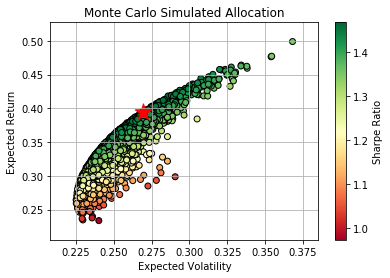

In [92]:
# Visualize the simulated portfolio for risk and return
fig = plt.figure()
ax = plt.axes()

ax.set_title('Monte Carlo Simulated Allocation')

# Simulated portfolios
fig.colorbar(ax.scatter(port_vols, port_rets, c=port_rets / port_vols, 
                        marker='o', cmap='RdYlGn', edgecolors='black'), label='Sharpe Ratio') 

# Maximum sharpe ratio portfolio
ax.scatter(msrp['volatility'], msrp['returns'], c='red', marker='*', s = 300, label='Max Sharpe Ratio')

ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')
ax.grid(True)


<h2 id="Efficient-Frontier">Efficient Frontier<a class="anchor-link" href="#Efficient-Frontier">¶</a></h2>



<p>The Efficient Frontier is formed by a set of portfolios offering the highest expected portfolio return for a certain volatility or offering the lowest volatility for a certain level of expected returns.</p>
<p><strong>Return objective</strong>:</p>
$$\underset{w_1,w_2,\dots,w_n}{minimize} \space\space \sigma^2_{p}(w_1,w_2,\dots,w_n)$$<p>subject to,</p>
$$E[R_p] = m$$<p><strong>Risk constraint</strong>:</p>
$$\underset{w_1,w_2,\dots,w_n}{maximize} \space\space E[R_p(w_1,w_2,\dots,w_n)]$$<p>subject to,</p>
$$\sigma^2_{p}(w_1,w_2,\dots,w_n)=v^2$$<p>where, $\sum_{i=1}^{n}w_i=1$ for the above objectives.</p>
<p>We can use numerical optimization to achieve this objective. The goal of optimization is to find the optimal value of the objective function by adjusting the target variables operating withing some boundary conditions and constraints.</p>



<h3 id="Constrained-Optimization">Constrained Optimization<a class="anchor-link" href="#Constrained-Optimization">¶</a></h3><p>Construction of optimal portfolios is a constrained optimization problem where we specify some boundary conditions and constraints. The objective function here is a function returning maximum sharpe ratio, minimum variance (volatility) and the target variables are portfolio weights. We will use the <em><code>minimize</code></em> function from <code>scipy</code> optimization module to achieve our objective.</p>
<blockquote><div class="highlight"><pre><span></span><span class="n">sco</span><span class="o">.</span><span class="n">minimize</span><span class="p">(</span><span class="n">fun</span><span class="p">,</span> <span class="n">x0</span><span class="p">,</span> <span class="n">args</span><span class="o">=</span><span class="p">(),</span> <span class="n">method</span><span class="o">=</span><span class="kc">None</span><span class="p">,</span> <span class="n">jac</span><span class="o">=</span><span class="kc">None</span><span class="p">,</span> <span class="n">hess</span><span class="o">=</span><span class="kc">None</span><span class="p">,</span> <span class="n">hessp</span><span class="o">=</span><span class="kc">None</span><span class="p">,</span> 
             <span class="n">bounds</span><span class="o">=</span><span class="kc">None</span><span class="p">,</span> <span class="n">constraints</span><span class="o">=</span><span class="p">(),</span> <span class="n">tol</span><span class="o">=</span><span class="kc">None</span><span class="p">,</span> <span class="n">callback</span><span class="o">=</span><span class="kc">None</span><span class="p">,</span> <span class="n">options</span><span class="o">=</span><span class="kc">None</span><span class="p">)</span>
</pre></div>
</blockquote>


In [94]:
# Import optimization module from scipy
import scipy.optimize as sco


<h4 id="Maximum-sharpe-ratio-portfolio">Maximum sharpe ratio portfolio<a class="anchor-link" href="#Maximum-sharpe-ratio-portfolio">¶</a></h4>


In [95]:
# Maximizing sharpe ratio
def min_sharpe_ratio(weights):
    return -portfolio_stats(weights)[2] # asigning minus 1

In [104]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(numofasset))
initial_wts = numofasset*[1./numofasset]

In [97]:
# Optimizing for maximum sharpe ratio
opt_sharpe = sco.minimize(min_sharpe_ratio, initial_wts, method='SLSQP', bounds=bnds, constraints=cons)

In [98]:
opt_sharpe

     fun: -1.4700472487973157
     jac: array([-0.00015733,  0.00020868,  0.00023256,  0.13468298, -0.00020431])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.20046442, 0.3221081 , 0.14158659, 0.        , 0.33584088])

In [99]:
# Portfolio weights
list(zip(symbols,np.around(opt_sharpe['x']*100,2)))

[('AAPL', 20.05),
 ('AMZN', 32.21),
 ('FB', 14.16),
 ('GOOG', 0.0),
 ('NFLX', 33.58)]

In [100]:
# Portfolio stats
stats = ['Returns', 'Volatility', 'Sharpe Ratio']
list(zip(stats,np.around(portfolio_stats(opt_sharpe['x']),4)))

[('Returns', 0.398), ('Volatility', 0.2707), ('Sharpe Ratio', 1.47)]


<h4 id="Minumum-variance-portfolio">Minumum variance portfolio<a class="anchor-link" href="#Minumum-variance-portfolio">¶</a></h4>


In [105]:
# Minimize the variance
def min_variance(weights):
    return portfolio_stats(weights)[1]**2

In [106]:
# Optimizing for minimum variance
opt_var = sco.minimize(min_variance, initial_wts, method='SLSQP', bounds=bnds, constraints=cons)

In [107]:
opt_var

     fun: 0.05070031785341735
     jac: array([0.10156264, 0.10117619, 0.10132438, 0.10133453, 0.10169046])
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.35133027, 0.16067712, 0.06410735, 0.39000688, 0.03387838])

In [108]:
# Portfolio weights
list(zip(symbols,np.around(opt_var['x']*100,2)))

[('AAPL', 35.13),
 ('AMZN', 16.07),
 ('FB', 6.41),
 ('GOOG', 39.0),
 ('NFLX', 3.39)]

In [109]:
# Portfolio stats
list(zip(stats,np.around(portfolio_stats(opt_var['x']),4)))

[('Returns', 0.2612), ('Volatility', 0.2252), ('Sharpe Ratio', 1.16)]


<h4 id="Efficient-Frontier-portfolio">Efficient Frontier portfolio<a class="anchor-link" href="#Efficient-Frontier-portfolio">¶</a></h4><p>For efficient frontier portfolios, we fix a target return and derive for objective function.</p>


In [110]:
# Minimize the volatility
def min_volatility(weights):
    return portfolio_stats(weights)[1]

In [111]:
targetrets = linspace(0.22,0.50,100)
tvols = []

for tr in targetrets:
    
    ef_cons = ({'type': 'eq', 'fun': lambda x: portfolio_stats(x)[0] - tr},
               {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    
    opt_ef = sco.minimize(min_volatility, initial_wts, method='SLSQP', bounds=bnds, constraints=ef_cons)
    
    tvols.append(opt_ef['fun'])

targetvols = array(tvols)

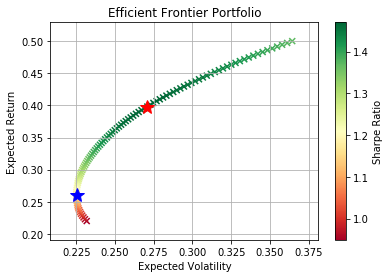

In [112]:
# Visualize the simulated portfolio for risk and return
fig = plt.figure()
ax = plt.axes()

ax.set_title('Efficient Frontier Portfolio')

# Efficient Frontier
fig.colorbar(ax.scatter(targetvols, targetrets, c=targetrets / targetvols, 
                        marker='x', cmap='RdYlGn', edgecolors='black'), label='Sharpe Ratio') 

# Maximum Sharpe Portfolio
ax.plot(portfolio_stats(opt_sharpe['x'])[1], portfolio_stats(opt_sharpe['x'])[0], 'r*', markersize =15.0)

# Minimum Variance Portfolio
ax.plot(portfolio_stats(opt_var['x'])[1], portfolio_stats(opt_var['x'])[0], 'b*', markersize =15.0)

ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')
ax.grid(True)


<h1 id="References">References<a class="anchor-link" href="#References">¶</a></h1><ul>
<li><p>Numpy linear algebra documentation <a href="https://numpy.org/doc/stable/reference/routines.linalg.html">https://numpy.org/doc/stable/reference/routines.linalg.html</a></p>
</li>
<li><p>Scipy optimization function documentation <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html">https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html</a></p>
</li>
<li><p>Xlwings documentation <a href="https://docs.xlwings.org/en/stable/index.html">https://docs.xlwings.org/en/stable/index.html</a></p>
</li>
<li><p>Yves Hilpisch (2018), Python For Finance: Analyze Big Financial Data</p>
</li>
</ul>
